
## Step 1: Load and Inspect the Data
Load the file to view its structure, including column names, data types, and basic statistics.
Check for missing or duplicate data.

In [ ]:
import pandas as pd

# File path
file_path = '/content/bitcoin_price_Training - Training.csv'

# Load the data
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

# Display the first few rows of the dataset
print("\nFirst Five Rows of the Dataset:")
print(data.head())
df = pd.DataFrame(data)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB
None

First Five Rows of the Dataset:
           Date     Open     High      Low    Close         Volume  \
0  Jul 31, 2017  2763.24  2889.62  2720.61  2875.34    860,575,000   
1  Jul 30, 2017  2724.39  2758.53  2644.85  2757.18    705,943,000   
2  Jul 29, 2017  2807.02  2808.76  2692.80  2726.45    803,746,000   
3  Jul 28, 2017  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
4  Jul 27, 2017  2538.71  2693.32  2529.34  2671.78    789,104,

In [ ]:
import pandas as pd

# File path
file_path = '/content/bitcoin_price_Training - Training.csv'

# Load the data into a DataFrame
df = pd.read_csv(file_path)

# Display the first five rows of the DataFrame
print(df.head())
df = pd.DataFrame(data)


           Date     Open     High      Low    Close         Volume  \
0  Jul 31, 2017  2763.24  2889.62  2720.61  2875.34    860,575,000   
1  Jul 30, 2017  2724.39  2758.53  2644.85  2757.18    705,943,000   
2  Jul 29, 2017  2807.02  2808.76  2692.80  2726.45    803,746,000   
3  Jul 28, 2017  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
4  Jul 27, 2017  2538.71  2693.32  2529.34  2671.78    789,104,000   

       Market Cap  
0  45,535,800,000  
1  44,890,700,000  
2  46,246,700,000  
3  44,144,400,000  
4  41,816,500,000  


### Step 2: Exploratory Data Analysis (EDA)
Generate summary statistics (mean, median, mode, standard deviation, etc.).

Identify the distribution of numeric variables using histograms.

Explore correlations between variables using a correlation matrix or heatmap.

Visualize trends or patterns in the dataset (e.g., line charts for time-series data).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# File path
file_path = '/content/bitcoin_price_Training - Training.csv'

# Load the data
df = pd.read_csv(file_path)

# Data Cleaning
df['Volume'] = df['Volume'].replace('-', np.nan).str.replace(',', '').astype(float)
df['Market Cap'] = df['Market Cap'].replace('-', np.nan).str.replace(',', '').astype(float)
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# 1. Generate Summary Statistics
print("Summary Statistics:")
print(df.describe())
print("\nMode of Each Column:")
print(df.mode().iloc[0])  # Show first mode only
print = df

Summary Statistics:
                      Date         Open         High          Low  \
count                 1556  1556.000000  1556.000000  1556.000000   
mean   2015-06-14 12:00:00   582.625328   597.992847   567.851446   
min    2013-04-28 00:00:00    68.500000    74.560000    65.530000   
25%    2014-05-21 18:00:00   254.287500   260.327500   248.835000   
50%    2015-06-14 12:00:00   438.600000   447.560000   430.570000   
75%    2016-07-07 06:00:00   662.437500   674.525000   646.735000   
max    2017-07-31 00:00:00  2953.220000  2999.910000  2840.530000   
std                    NaN   523.137312   542.992855   505.877401   

             Close        Volume    Market Cap  
count  1556.000000  1.313000e+03  1.556000e+03  
mean    584.239396  1.481643e+08  8.694353e+09  
min      68.430000  2.857830e+06  7.792550e+08  
25%     254.320000  2.071070e+07  3.598355e+09  
50%     438.855000  4.530140e+07  6.386210e+09  
75%     663.402500  9.037880e+07  9.898830e+09  
max    2958.110

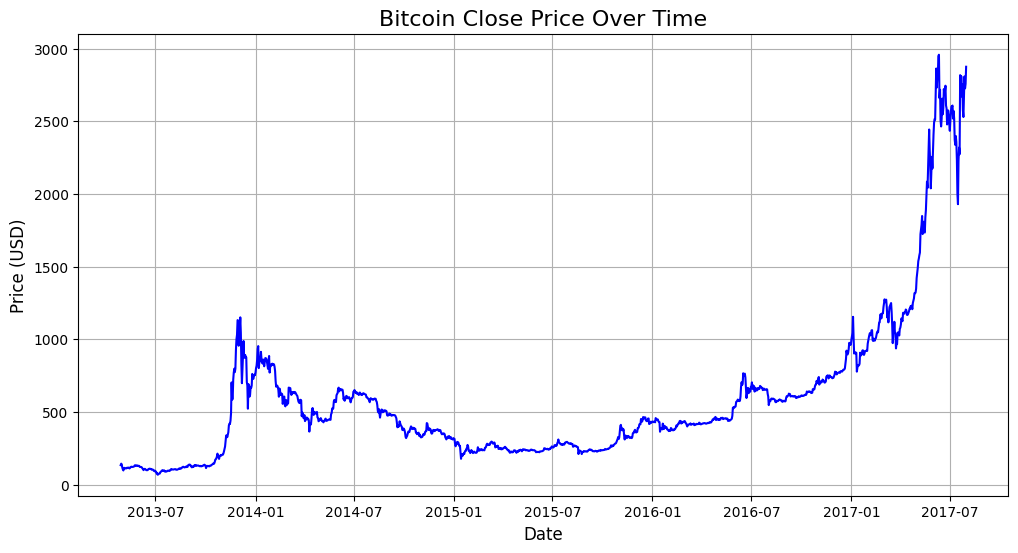

KeyError: '7-day MA'

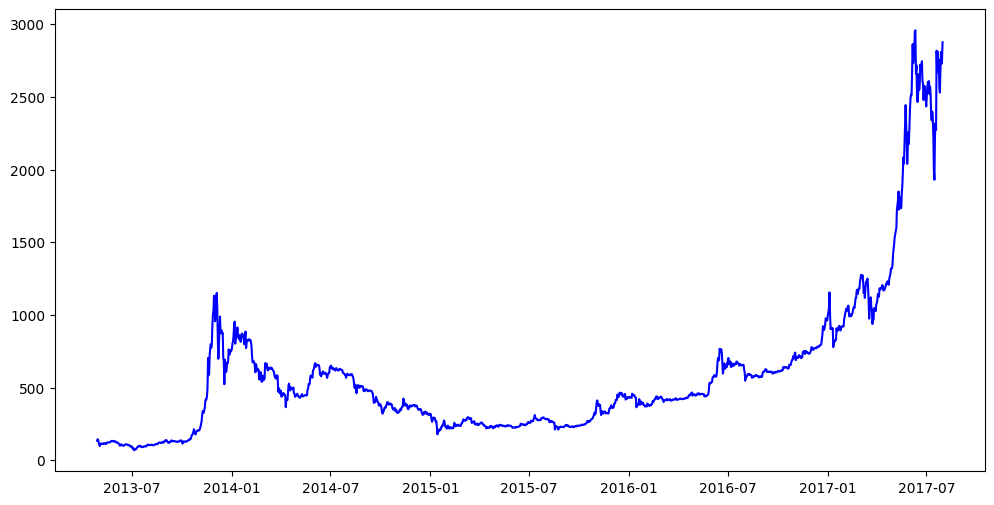

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 5: Advanced Analysis

# 1. Time-Series Analysis: Check for Seasonality/Trends
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Bitcoin Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True)
plt.show()

# Add moving averages to detect trends
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['7-day MA'], label='7-day MA', color='red', linestyle='--')
plt.title('Bitcoin Close Price and 7-day Moving Average', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# 2. Outliers Detection using Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Boxplot of Bitcoin Prices', fontsize=16)
plt.show()

# Using Z-score to identify outliers (threshold of 3)
z_scores = np.abs(stats.zscore(df[['Open', 'High', 'Low', 'Close']]))
outliers = (z_scores > 3)
print("Outliers detected (Z-score > 3):")
print(df[outliers.any(axis=1)])

# 3. Cluster Analysis (e.g., K-means)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Open', 'High', 'Low', 'Close']])

# Plotting clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Date'], y=df['Close'], hue=df['Cluster'], palette='viridis')
plt.title('Bitcoin Price Clusters', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.show()

# 4. Principal Component Analysis (PCA)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[['Open', 'High', 'Low', 'Close']])

# Creating a DataFrame with PCA results
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# Plotting PCA components
plt.figure(figsize=(12, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=df['Cluster'], palette='viridis')
plt.title('PCA of Bitcoin Prices', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.show()


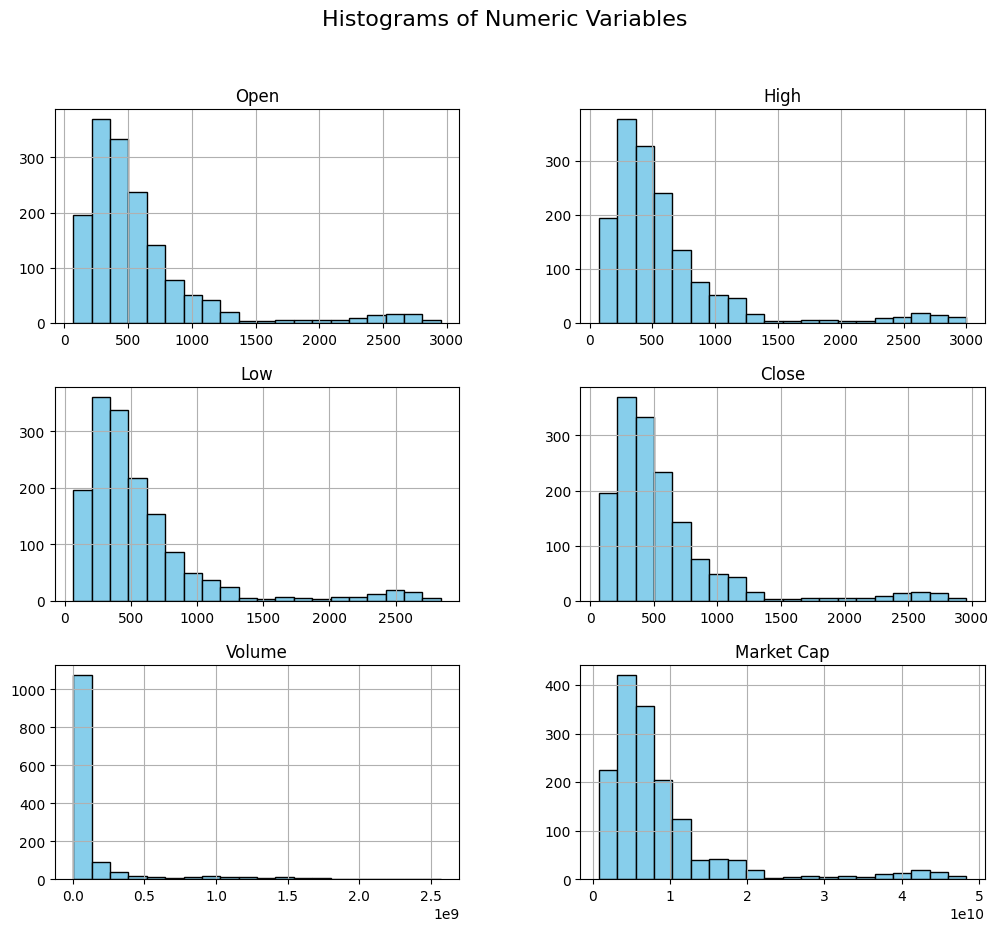

In [ ]:
# 2. Distribution of Numeric Variables
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']
df[numeric_columns].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Variables', fontsize=16)
plt.show()


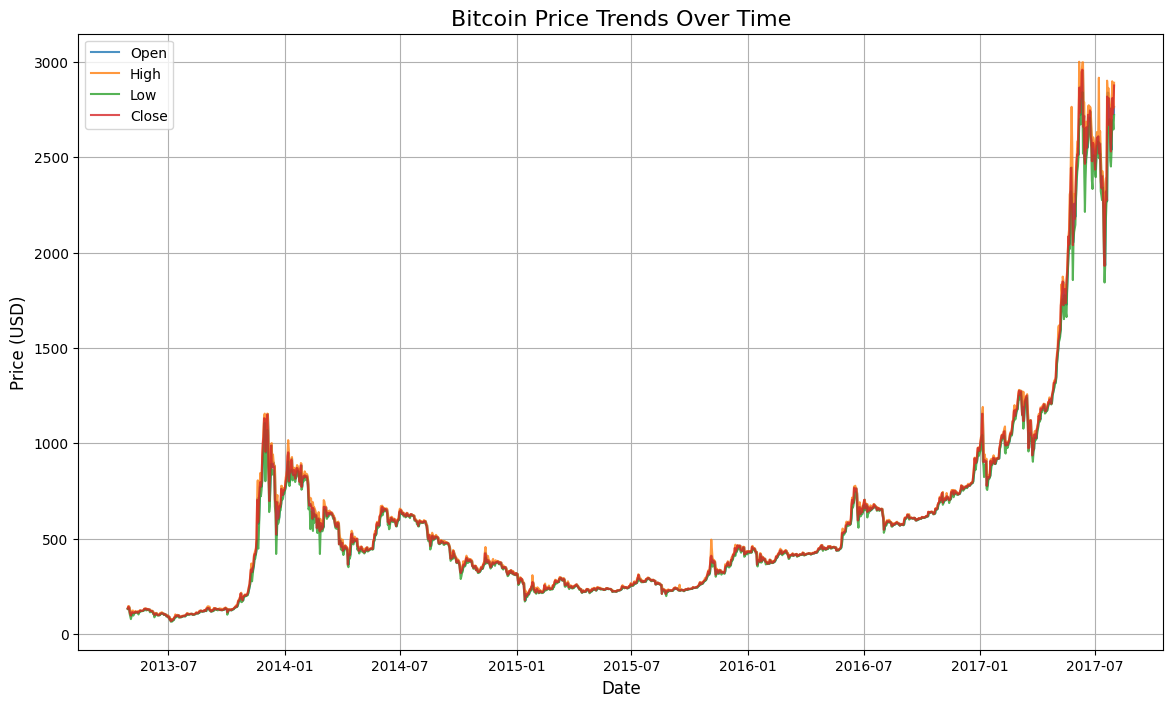

In [ ]:

# 4. Time-Series Trends
plt.figure(figsize=(14, 8))
for col in ['Open', 'High', 'Low', 'Close']:
    plt.plot(df['Date'], df[col], label=col, alpha=0.8)
plt.title('Bitcoin Price Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Summary Statistics:
                      Date         Open         High          Low  \
count                 1556  1556.000000  1556.000000  1556.000000   
mean   2015-06-14 12:00:00   582.625328   597.992847   567.851446   
min    2013-04-28 00:00:00    68.500000    74.560000    65.530000   
25%    2014-05-21 18:00:00   254.287500   260.327500   248.835000   
50%    2015-06-14 12:00:00   438.600000   447.560000   430.570000   
75%    2016-07-07 06:00:00   662.437500   674.525000   646.735000   
max    2017-07-31 00:00:00  2953.220000  2999.910000  2840.530000   
std                    NaN   523.137312   542.992855   505.877401   

             Close        Volume    Market Cap  
count  1556.000000  1.313000e+03  1.556000e+03  
mean    584.239396  1.481643e+08  8.694353e+09  
min      68.430000  2.857830e+06  7.792550e+08  
25%     254.320000  2.071070e+07  3.598355e+09  
50%     438.855000  4.530140e+07  6.386210e+09  
75%     663.402500  9.037880e+07  9.898830e+09  
max    2958.110

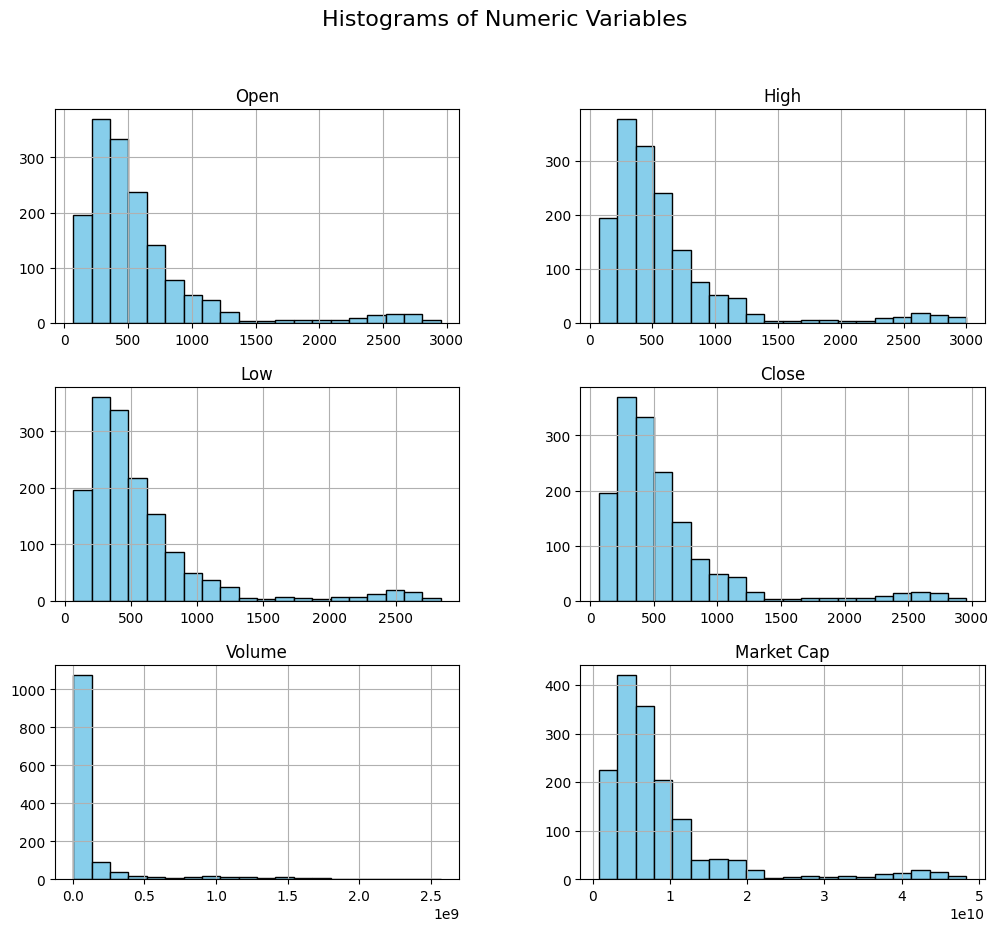


Correlation Matrix:
                Open      High       Low     Close    Volume  Market Cap
Open        1.000000  0.998561  0.998157  0.997514  0.884873    0.995153
High        0.998561  1.000000  0.997320  0.998596  0.895735    0.993298
Low         0.998157  0.997320  1.000000  0.998755  0.876867    0.994575
Close       0.997514  0.998596  0.998755  1.000000  0.886549    0.993041
Volume      0.884873  0.895735  0.876867  0.886549  1.000000    0.894608
Market Cap  0.995153  0.993298  0.994575  0.993041  0.894608    1.000000


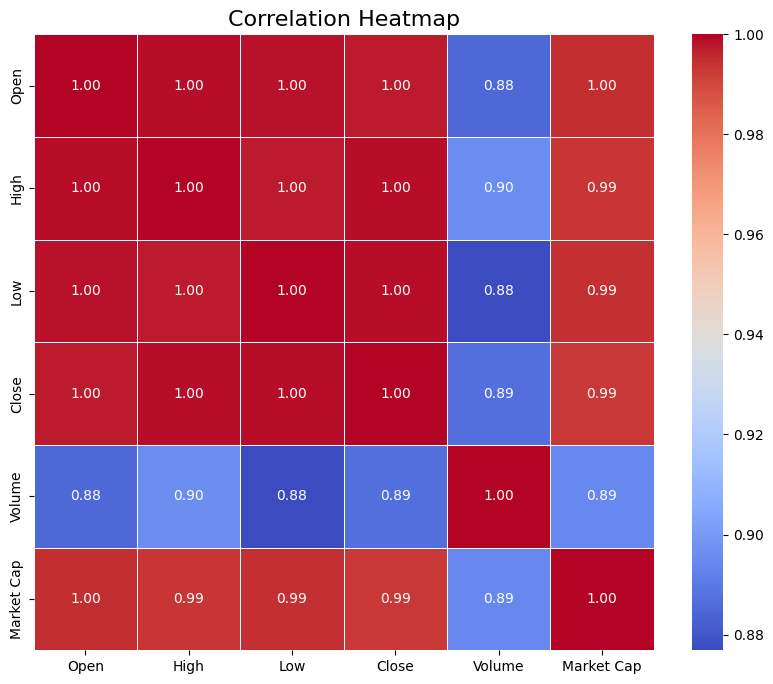

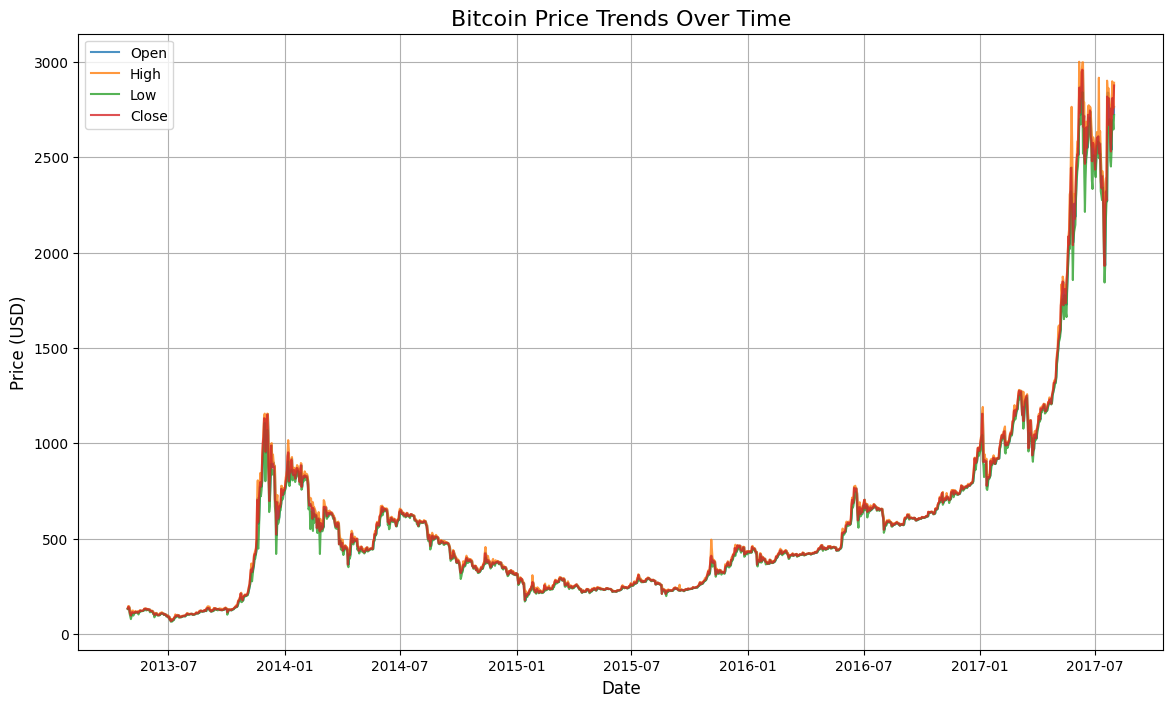

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data (ensure you have the correct path)
file_path = '/content/bitcoin_price_Training - Training.csv'
df = pd.read_csv(file_path)

# Data cleaning (replace non-numeric values in 'Volume' and 'Market Cap')
df['Volume'] = df['Volume'].replace('-', np.nan).str.replace(',', '').astype(float)
df['Market Cap'] = df['Market Cap'].replace('-', np.nan).str.replace(',', '').astype(float)
df['Date'] = pd.to_datetime(df['Date'])

# 1. Generate Summary Statistics
import builtins
builtins.print("Summary Statistics:")
builtins.print(df.describe())  # Summary statistics for numeric columns # Use builtins.print to call the original print function
builtins.print("\nMode of Each Column:")
builtins.print(df.mode().iloc[0])  # Mode for each column (first mode) # Use builtins.print to call the original print function


# 2. Distribution of Numeric Variables
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']
df[numeric_columns].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Variables', fontsize=16)
plt.show()

# 3. Correlation Matrix
builtins.print("\nCorrelation Matrix:") # Use builtins.print to call the original print function
correlation_matrix = df[numeric_columns].corr()
builtins.print(correlation_matrix) # Use builtins.print to call the original print function

# Heatmap for Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# 4. Time-Series Trends
plt.figure(figsize=(14, 8))
for col in ['Open', 'High', 'Low', 'Close']:
    plt.plot(df['Date'], df[col], label=col, alpha=0.8)
plt.title('Bitcoin Price Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

#  Step 3: Data Cleaning
#Handle Missing Values:

Impute or remove missing data depending on the situation.

Address Duplicates:

Remove any duplicate rows.

Normalize/Standardize Data:

If necessary, scale the data (e.g., using Min-Max scaling or Standardization).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Step 3: Data Cleaning

# 1. Handle Missing Values
# Check for missing values in the DataFrame
import builtins  # Import builtins module to access the original print function
builtins.print("Missing Values:")  # Use builtins.print to call the original print function
builtins.print(df.isnull().sum())  # Use builtins.print to call the original print function

# Option 1: Impute missing values (for numerical columns, using median as an example)
df['Volume'].fillna(df['Volume'].median(), inplace=True)
df['Market Cap'].fillna(df['Market Cap'].median(), inplace=True)

# Option 2: Drop rows with missing values (if preferred)
# df.dropna(inplace=True)

# 2. Address Duplicates
builtins.print("Duplicate Rows:")  # Use builtins.print to call the original print function
builtins.print(df.duplicated().sum())  # Check for duplicates; use builtins.print  # Use builtins.print to call the original print function
df.drop_duplicates(inplace=True)  # Remove duplicates

# 3. Normalize or Standardize Data if Needed
# Example: Using MinMaxScaler or StandardScaler on 'Open', 'High', 'Low', 'Close' prices
scaler = MinMaxScaler()
df[['Open', 'High', 'Low', 'Close']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close']])

# Alternatively, use StandardScaler for standardization (Z-score normalization)
# scaler = StandardScaler()
# df[['Open', 'High', 'Low', 'Close']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close']])

Missing Values:
Date            0
Open            0
High            0
Low             0
Close           0
Volume        243
Market Cap      0
dtype: int64
Duplicate Rows:
0


<ipython-input-44-37edc3f8b6a9>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Volume'].fillna(df['Volume'].median(), inplace=True)
<ipython-input-44-37edc3f8b6a9>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'df' is already loaded, let's handle the issues step by step

# Step 4: Feature Engineering

# 1. Create New Variables (e.g., Price Range)
df['Price Range'] = df['High'] - df['Low']

# 2. Create Time Features (for time-series data)
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday  # Monday=0, Sunday=6

# 3. Log Transformation (Handle zero or negative values)
# Adding a small constant (1) to avoid log(0) errors
df['Log Close'] = np.log(df['Close'] + 1)  # Adding 1 to avoid log(0)

# 4. Moving Average (e.g., 7-day rolling mean)
df['7-day MA'] = df['Close'].rolling(window=7).mean()

# Show the newly created columns
# Use the built-in print function by calling it through the 'builtins' module
import builtins
builtins.print(df[['Date', 'Price Range', 'Year', 'Month', 'Day', 'Weekday', 'Log Close', '7-day MA']].head())

        Date  Price Range  Year  Month  Day  Weekday  Log Close  7-day MA
0 2017-07-31       169.01  2017      7   31        0   7.964274       NaN
1 2017-07-30       113.68  2017      7   30        6   7.922326       NaN
2 2017-07-29       115.96  2017      7   29        5   7.911122       NaN
3 2017-07-28       217.72  2017      7   28        4   7.940943       NaN
4 2017-07-27       163.98  2017      7   27        3   7.890874       NaN


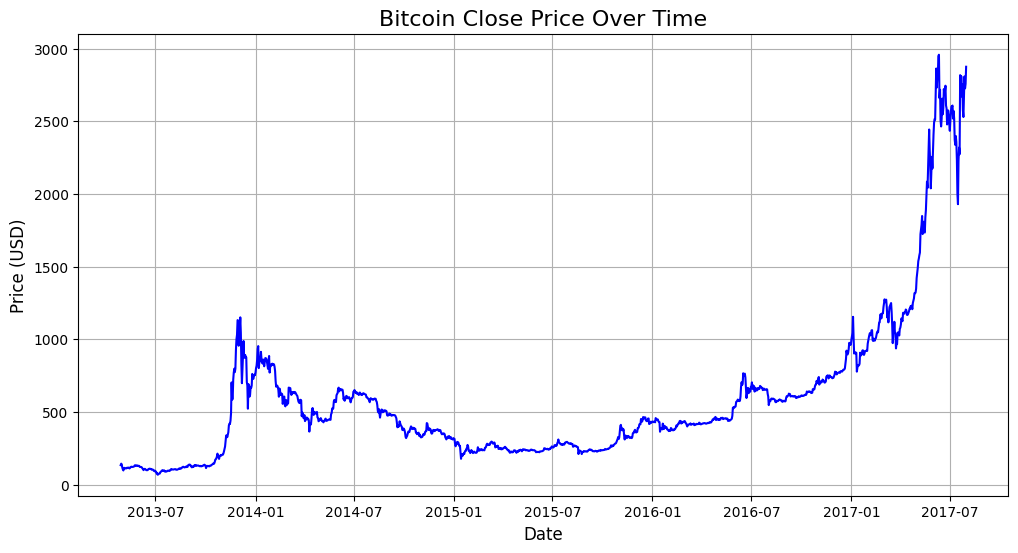

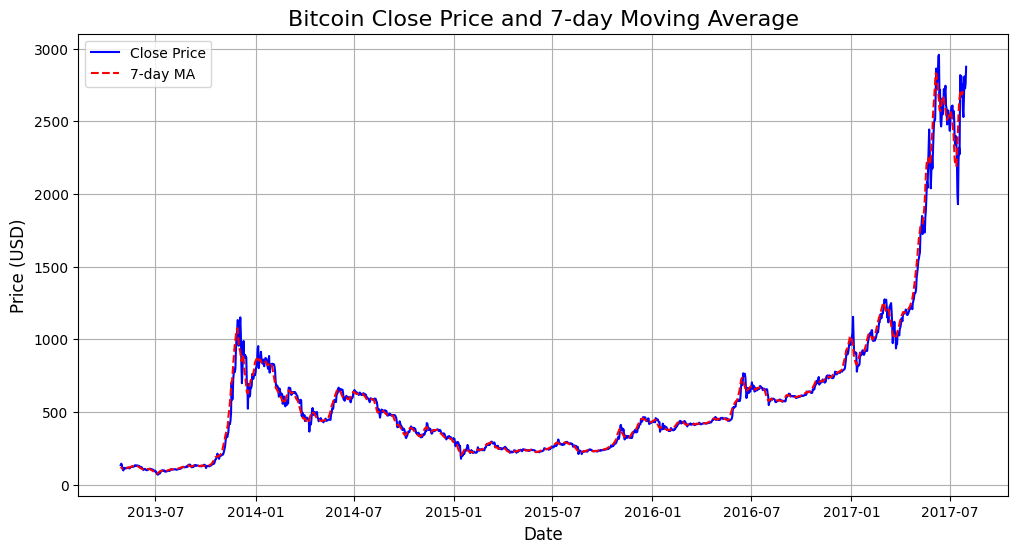

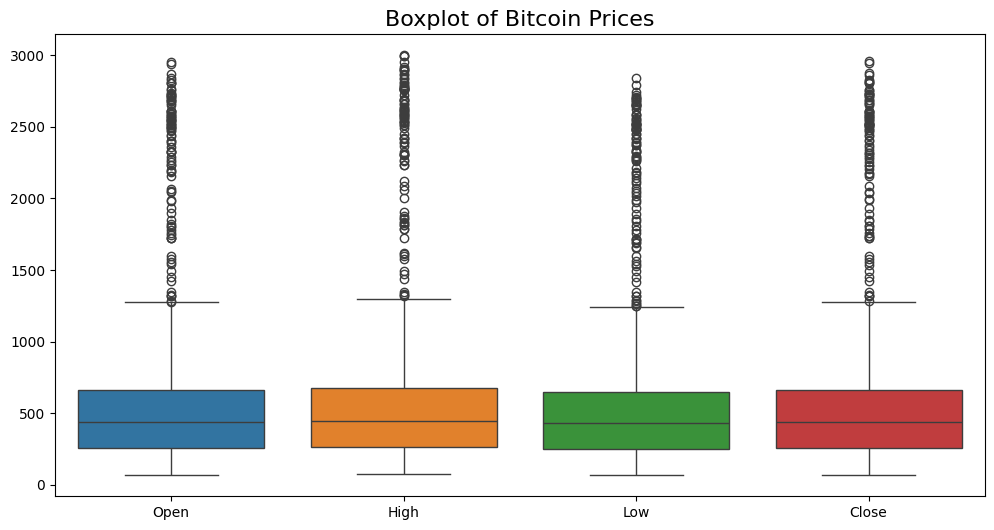

Outliers detected (Z-score > 3):
         Date     Open     High      Low    Close         Volume  \
0  2017-07-31  2763.24  2889.62  2720.61  2875.34    860,575,000   
1  2017-07-30  2724.39  2758.53  2644.85  2757.18    705,943,000   
2  2017-07-29  2807.02  2808.76  2692.80  2726.45    803,746,000   
3  2017-07-28  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
4  2017-07-27  2538.71  2693.32  2529.34  2671.78    789,104,000   
..        ...      ...      ...      ...      ...            ...   
66 2017-05-26  2320.89  2573.79  2071.99  2202.42  1,763,480,000   
67 2017-05-25  2446.24  2763.71  2285.30  2304.98  2,406,700,000   
68 2017-05-24  2321.37  2523.72  2321.37  2443.64  1,725,380,000   
69 2017-05-23  2191.56  2320.82  2178.50  2320.42  1,378,750,000   
70 2017-05-22  2043.19  2303.90  2017.87  2173.40  1,942,220,000   

        Market Cap  Price Range  Year  Month  Day  Weekday  Log Close  \
0   45,535,800,000       169.01  2017      7   31        0   7.964274   
1   

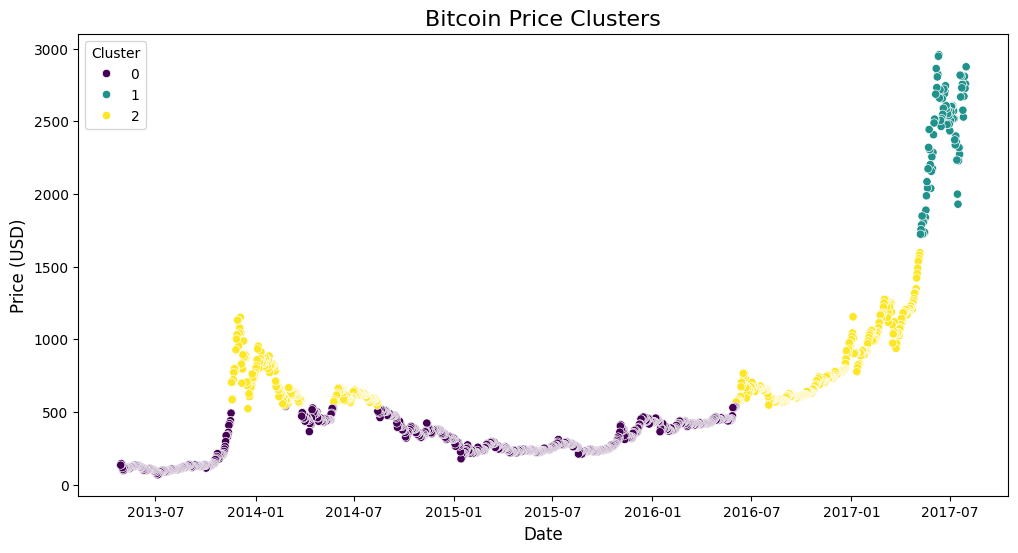

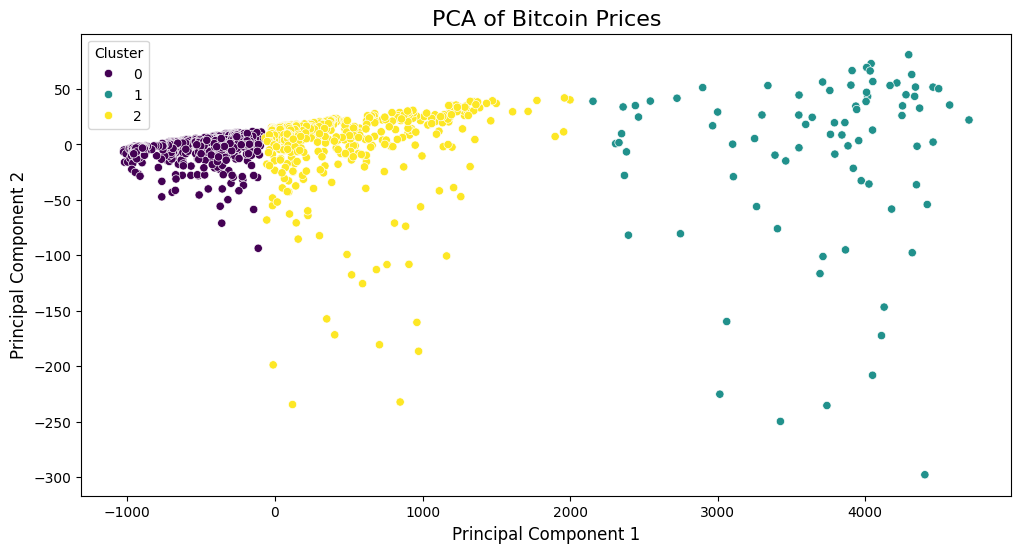

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import builtins

# Step 5: Advanced Analysis

# 1. Time-Series Analysis: Check for Seasonality/Trends
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Bitcoin Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True)
plt.show()

# Add moving averages to detect trends
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['7-day MA'], label='7-day MA', color='red', linestyle='--')
plt.title('Bitcoin Close Price and 7-day Moving Average', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# 2. Outliers Detection using Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Boxplot of Bitcoin Prices', fontsize=16)
plt.show()

# Using Z-score to identify outliers (threshold of 3)
z_scores = np.abs(stats.zscore(df[['Open', 'High', 'Low', 'Close']]))
outliers = (z_scores > 3)
builtins.print("Outliers detected (Z-score > 3):") # Use builtins.print to call the original print function
builtins.print(df[outliers.any(axis=1)]) # Use builtins.print to call the original print function

# 3. Cluster Analysis (e.g., K-means)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Open', 'High', 'Low', 'Close']])

# Plotting clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Date'], y=df['Close'], hue=df['Cluster'], palette='viridis')
plt.title('Bitcoin Price Clusters', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.show()

# 4. Principal Component Analysis (PCA)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[['Open', 'High', 'Low', 'Close']])

# Creating a DataFrame with PCA results
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# Plotting PCA components
plt.figure(figsize=(12, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=df['Cluster'], palette='viridis')
plt.title('PCA of Bitcoin Prices', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.show()

In [ ]:
import builtins
# Avoid potential conflict with any variable named 'print'
builtins.print("Descriptive Statistics for Volume:")
volume_stats = df['Volume'].describe()

# Display Volume stats
builtins.print(f"Mean = {volume_stats['mean'] / 1e6:.2f}M")
builtins.print(f"Std = {volume_stats['std'] / 1e6:.2f}M")
builtins.print(f"Min = {volume_stats['min'] / 1e6:.2f}M")
builtins.print(f"Max = {volume_stats['max'] / 1e9:.2f}B")

# Display Market Cap stats
market_cap_stats = df['Market Cap'].describe()
builtins.print("\nDescriptive Statistics for Market Cap:")
builtins.print(f"Mean = {market_cap_stats['mean'] / 1e9:.2f}B")
builtins.print(f"Std = {market_cap_stats['std'] / 1e9:.2f}B")
builtins.print(f"Min = {market_cap_stats['min'] / 1e9:.2f}B")
builtins.print(f"Max = {market_cap_stats['max'] / 1e9:.2f}B")

# Display statistics for Bitcoin prices (Open, High, Low, Close)
price_columns = ['Open', 'High', 'Low', 'Close']
price_stats = df[price_columns].describe()

builtins.print("\nDescriptive Statistics for Bitcoin Price (Open, High, Low, Close):")
for col in price_columns:
    builtins.print(f"{col}: Min = {price_stats[col]['min']:.2f}, Max = {price_stats[col]['max']:.2f}, Mean = {price_stats[col]['mean']:.2f}, Std = {price_stats[col]['std']:.2f}")


Descriptive Statistics for Volume:
Mean = 148.16M
Std = 324.30M
Min = 2.86M
Max = 2.57B

Descriptive Statistics for Market Cap:
Mean = 8.69B
Std = 8.71B
Min = 0.78B
Max = 48.39B

Descriptive Statistics for Bitcoin Price (Open, High, Low, Close):
Open: Min = 68.50, Max = 2953.22, Mean = 582.63, Std = 523.14
High: Min = 74.56, Max = 2999.91, Mean = 597.99, Std = 542.99
Low: Min = 65.53, Max = 2840.53, Mean = 567.85, Std = 505.88
Close: Min = 68.43, Max = 2958.11, Mean = 584.24, Std = 525.90
